# Human Desigend (World) Representation

**Author : Sangkeun Jung**

이번 강의에서는 이 세상을 표현하는 다양한 방법 중에서, 사람의 직관이나 수학알고리즘을 활용하여 데이터의 주요 특징(Feature)을 추출(Extraction) 하여 수(Numbers)로 표현하는 방법을 몇 가지 살펴봅니다. 

특히, 우리가 흔하게 접할 수 있는 자연어, 음성(향), 이미지 데이터들에 대해서 전통적인 Feature Extraction 테크닉 중 몇가지의 작동방법을 테스트 해보도록 합니다.

- 자연어 : Document to Vector
- 음성 : Fourier Transform and MFCC
- 이미지 : Face Feature Dection 

이 실습 파일은 아래의 링크에서 다운로드 받을 수 있습니다.
- https://rb.gy/gcmaag

_______________________

## Natural Language : Document to Vector

아래의 예제는 이 [링크](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html) 예제를 참고하였습니다.


CountVectorizer는 다음과 같은 세가지 작업을 수행한다.
- 문서를 토큰 리스트로 변환한다.
- 각 문서에서 토큰의 출현 빈도를 센다.
- 각 문서를 BOW 인코딩 벡터로 변환한다.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

### Document to Vector

In [2]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]], dtype=int64)

In [3]:
vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [4]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]], dtype=int64)

In [5]:
vect.transform(corpus).toarray().shape

(5, 10)

### Stop words

Stop Words 는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다. 보통 영어의 관사나 접속사, 한국어의 조사 등이 여기에 해당한다. stop_words 인수로 조절할 수 있다.

In [6]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

_____________________________

## Speech Data  : Fourier Transform and MFCC

- 오디오 데이터의 기본 속성에 대해 살펴보고
- 오디오 데이터를 FT를 이용해 변형해 본 후 
- 원 데이터에 어떤 주파수를 가지고 있는지를 살펴봅니다.
- FT의 기본 작동 방법과 응용에 대해 살펴봅니다.
- 이 자료는 아래 링크의 설명자료에 기반하여 작성되었습니다.
  - https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

### Fourier Transform

#### A : Sin wave 생성 (Frequency = 3)

In [4]:
from matplotlib import pyplot as plt
from librosa import display

C:\Users\hugman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


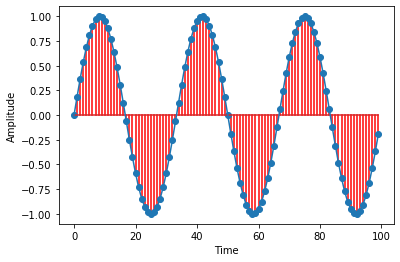

In [5]:
import numpy as np
samples = 100
frequency = 3

x  = np.arange(samples)
y1 = np.sin(2*np.pi*frequency*(x/samples))

plt.figure()
plt.stem(x, y1, 'r')
plt.plot(x, y1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

wav 를 그리기 위해 필요한 정보

- frequency
- peak 의 수치 (꼭지점의 값)

C:\Users\hugman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


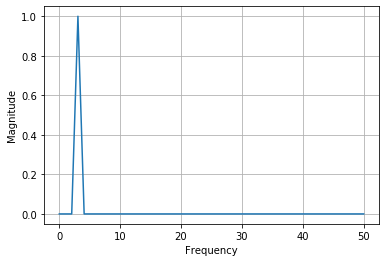

In [6]:
import scipy
def fft_plot(audio, sampling_rate):
    n = len(audio)
    T = 1.0 / sampling_rate
    yf = scipy.fft(audio)
    
    xf = np.linspace(0.0, 1.0/(2.0*T), int(n/2))
    
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    return plt.show()
fft_plot(y1, 100.0)

위 그림에서, peak 부분에 해당하는 frequency 가 3인 것을 확인할 수 있음

#### B : Sin wave 생성 (Frequency = 11)

C:\Users\hugman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


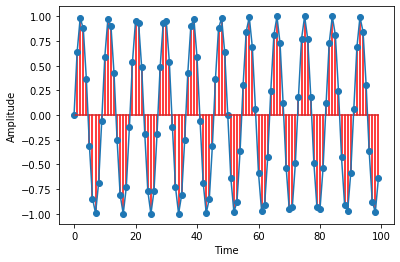

In [7]:
samples = 100
frequency = 11

x = np.arange(samples)
y2 = np.sin(2*np.pi*frequency*(x/samples))

plt.figure()
plt.stem(x, y2, 'r')
plt.plot(x, y2)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

C:\Users\hugman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


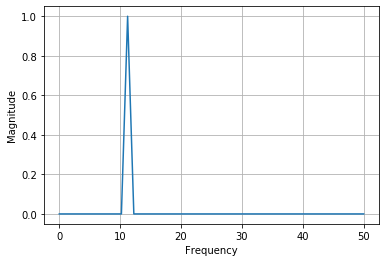

In [8]:
fft_plot(y2, 100)

#### 두개의 파형을 하나로 만듦

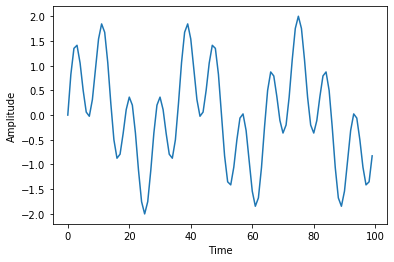

In [9]:
y3 = y1 + y2

plt.figure()
plt.plot(x, y3)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

C:\Users\hugman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


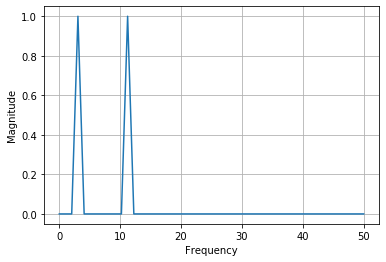

In [10]:
fft_plot(y3, 100)

위 그림에서, peak 부분에 해당하는 frequency 가 3과 11인 것을 확인할 수 있음

### MFCC : Fourier Transform application on Speech Data

#### Load Sound

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from IPython.display import Audio
Audio('./wav/1_1.wav')

In [13]:
# install librosa if you don't have
!pip install librosa

In [14]:
import librosa
audio_samples, audio_sampling_rate = librosa.load('./wav/1_1.wav', sr=None, mono=True, offset=0.0, duration=None)
duration_of_sound = len(audio_samples) / audio_sampling_rate

print("Sampling Rate : ", audio_sampling_rate)
print("Length of the sound : ", len(audio_samples) )
print("Length of the sound (secs): ", duration_of_sound, " secs" )

Sampling Rate :  44100
Length of the sound :  106496
Length of the sound (secs):  2.414875283446712  secs


In [15]:
print( type(audio_samples) )
print( audio_samples.shape )
audio_samples

<class 'numpy.ndarray'>
(106496,)


array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        0.0000000e+00,  0.0000000e+00, -1.5258789e-05], dtype=float32)

#### Visualizing Audio

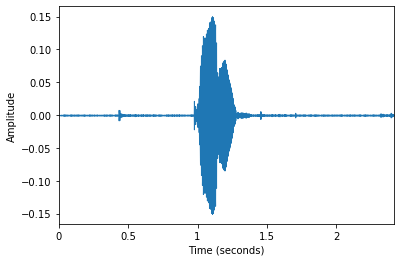

In [16]:
from matplotlib import pyplot as plt
from librosa import display

plt.figure()
librosa.display.waveplot(y=audio_samples, sr=audio_sampling_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
ax = plt.show()

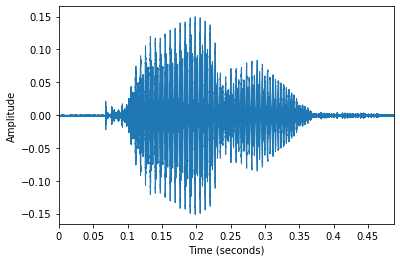

In [17]:
# trim
start = 40000
end = 61496
trimmed_samples = audio_samples[start:end]
plt.figure()
librosa.display.waveplot(y=trimmed_samples, sr=audio_sampling_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
ax = plt.show()

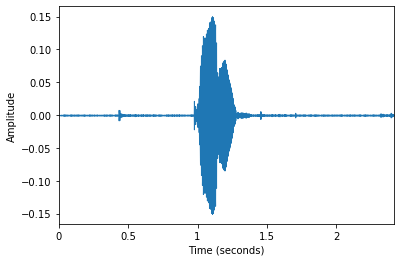

In [18]:
from matplotlib import pyplot as plt
from librosa import display

plt.figure()
librosa.display.waveplot(y=audio_samples, sr=audio_sampling_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
ax = plt.show()

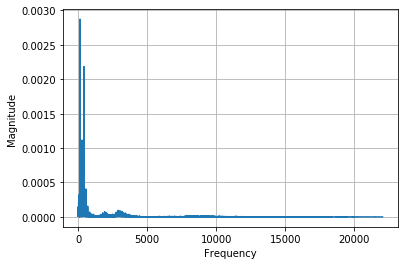

In [22]:
fft_plot(audio_samples, audio_sampling_rate)

#### Spectogram 그려보기

- DFT 의 경우 시간에 대한 정보가 모두 사라진다.
적절히 sliding-window 방식으로 데이터를 가공한 후 
각 Window 마다의 frequency 정보를 보여주는 방식을 취하면 Time 과 Frequency 정보를 동시에 볼 수 있다.

- 이러한 방식으로 많이 활용되는 것을 Mel-Frequency Spectogram 이 있다.


In [19]:
def draw_mel_freq_spectogram(S):
    plt.figure(figsize=(10, 4))
    
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time',
                              y_axis='mel', sr=sr,
                              fmax=8000)
    
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

In [20]:
y, sr = librosa.load('./wav/1_1.wav', sr=None, mono=True, offset=0.0, duration=None)
S1 = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

#### Matrix form of speech data

In [21]:
print(S1.shape)
S1

(128, 209)


array([[4.85540695e-05, 8.07193937e-05, 2.17411449e-04, ...,
        7.38328032e-04, 5.86684444e-04, 1.41863085e-04],
       [4.69328588e-05, 2.26966135e-04, 1.93436703e-04, ...,
        2.38573155e-03, 1.29951653e-03, 1.33091919e-04],
       [1.44893289e-04, 2.75603204e-04, 7.55360117e-04, ...,
        5.22646634e-03, 3.49923340e-03, 1.16312283e-03],
       ...,
       [1.51806550e-08, 1.16508879e-07, 4.40803547e-07, ...,
        6.91370133e-06, 4.38984762e-06, 4.19466346e-07],
       [6.42365805e-09, 5.28674775e-08, 2.52356301e-07, ...,
        6.24122458e-06, 4.59863304e-06, 4.26250551e-07],
       [2.80061183e-08, 8.01472027e-08, 2.15899320e-07, ...,
        2.00430841e-05, 1.14592785e-05, 7.02003604e-07]], dtype=float32)

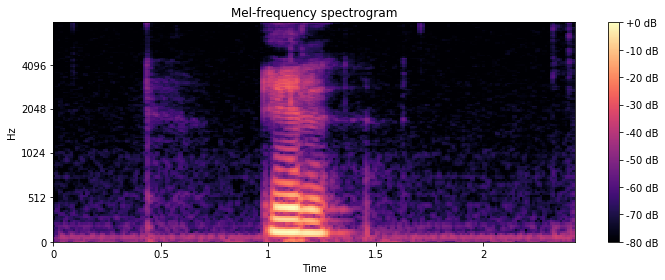

In [22]:
draw_mel_freq_spectogram(S1)

_______

### Face Feature Detector

아래 예는 [링크](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html)를 참고하였습니다.

In [27]:
!pip install opencv-python  # <-- in case you didn't have

지정된 파일을 찾을 수 없습니다.


#### Prepare simple face detector

사용한 얼굴 이미지는 아래 링크에서 생성된 얼굴이미지입니다.
- https://mymodernmet.com/free-ai-generated-faces/

In [23]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('./cv2_rscs/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./cv2_rscs/haarcascade_eye.xml')

img = cv2.imread('ai_generated_pic.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#### Draw face boundary and feature

In [24]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()